In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
dataset = load_digits()
dir(dataset)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [10]:
model = GridSearchCV(
    KNeighborsClassifier(),
    {
        'n_neighbors': range(2, 20)
    },
    cv=5,
    return_train_score=False
)

In [12]:
model.fit(dataset.data, dataset.target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 20)})

In [14]:
model.best_params_

{'n_neighbors': 2}

In [16]:
model = KNeighborsClassifier(n_neighbors=2)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3)

In [19]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [25]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 61,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 53,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  1,  0, 46,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0, 48]])

Text(50.722222222222214, 0.5, 'True')

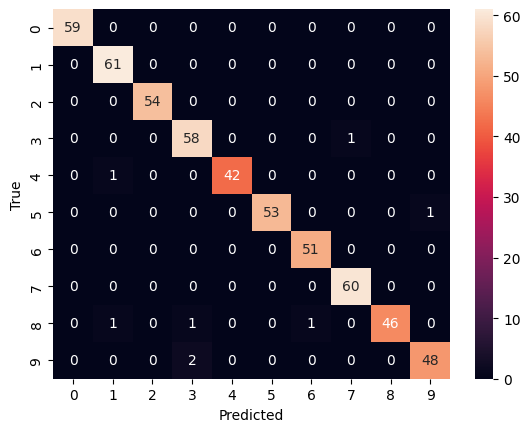

In [27]:
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')